In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("reviews.csv")
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [4]:
df.shape

(15746, 11)

<AxesSubplot:>

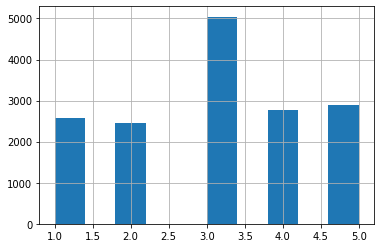

In [5]:
df["score"].hist()

In [6]:
label_map = {1: 1, 2: 1,
             3: 2,
             4: 3, 5: 3}

In [7]:
df["label"] = df["score"].map(label_map)

<AxesSubplot:>

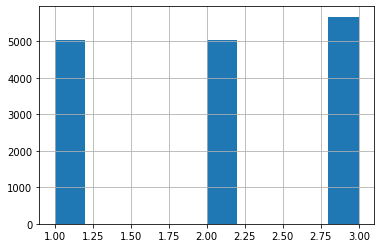

In [8]:
df["label"].hist()

# Load model

In [9]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [10]:
from transformers import BertTokenizer

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [11]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [12]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

In [13]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [14]:
for i, t in zip(tokens, token_ids):
    print(i, t)

When 1332
was 1108
I 146
last 1314
outside 1796
? 136
I 146
am 1821
stuck 5342
at 1120
home 1313
for 1111
2 123
weeks 2277
. 119


## Служебные токены

**конец предложения**

In [15]:
tokenizer.sep_token

'[SEP]'

In [16]:
tokenizer.sep_token_id

102

**задача классификации**

In [17]:
tokenizer.cls_token

'[CLS]'

In [18]:
tokenizer.cls_token_id

101

**паддинг**

In [19]:
tokenizer.pad_token

'[PAD]'

In [20]:
tokenizer.pad_token_id

0

**Неизвестные токены**

In [21]:
tokenizer.unk_token

'[UNK]'

In [22]:
tokenizer.unk_token_id

100

Добавляем служебные токены к предложению

In [23]:
sample_encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  padding=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2318: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [24]:
sample_encoding

{'input_ids': tensor([[ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
         1111,  123, 2277,  119,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1## Выбор оптимальной длины

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


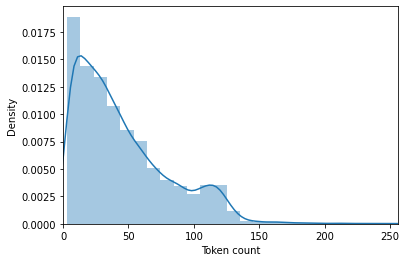

In [25]:
token_lens = []

for txt in df.content:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [26]:
MAX_LENGTH = 100

## Загрузка модели

In [27]:
from transformers import BertModel

In [28]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [29]:
bert_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [78]:
from torch.utils.data import Dataset, DataLoader

In [74]:
class GPReviewDataset(Dataset):

     def __init__(self, reviews, targets, tokenizer, max_len):

        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
  
     def __len__(self):
        return len(self.reviews)
  
     def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
        review,[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt')

        return {
         'review_text': review,
         'input_ids': encoding['input_ids'].flatten(),
         'attention_mask': encoding['attention_mask'].flatten(),
         'targets': torch.tensor(target, dtype=torch.long)} 

In [75]:
from sklearn.model_selection import train_test_split

In [84]:
import torch

In [76]:
RANDOM_SEED = 31

In [77]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [81]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
      reviews=df.content.to_numpy(),
      targets=df.label.to_numpy(),
      tokenizer=tokenizer,
     max_len=max_len)

    return DataLoader(
      ds,
      batch_size=batch_size,
      num_workers=4
  )

In [82]:
dl = create_data_loader(df_train, tokenizer, MAX_LENGTH, 8)

In [86]:
from torch import nn

In [92]:
sample_encoding

{'input_ids': tensor([[ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
         1111,  123, 2277,  119,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [93]:
y = bert_model(**sample_encoding)

In [112]:
r = sc(**sample_encoding)

In [113]:
r

tensor([[-0.0662,  0.3258,  0.2690]], grad_fn=<AddmmBackward0>)

## Training

In [106]:
from torch.optim import Adam

In [123]:
device = "cpu"

In [110]:
EPOCHS = 10

optimizer = Adam(model.parameters(), lr=2e-5)
total_steps = len(dl) * EPOCHS


loss_fn = nn.CrossEntropyLoss().to(device)

In [121]:
df_train.shape

(14171, 12)

In [154]:
class SentimentClassifier(nn.Module):

    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self._bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        self._drop = nn.Dropout(p=0.3)
        self._fc = nn.Linear(self._bert.config.hidden_size, n_classes)
  
    def forward(self, input_ids, attention_mask):
        x = self._bert(input_ids=input_ids, attention_mask=attention_mask).pooler_output
        x = self._drop(x)
        return self._fc(x)

In [156]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, n_examples):
    model = model.train()

    losses = []

    correct_predictions = 0
  
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()
    return outputs 
    #return correct_predictions.double() / n_examples, np.last_hidden_state=mean(losses)

In [ ]:
model = SentimentClassifier(n_classes=3)

v = train_epoch(model, dl, loss_fn, optimizer, device, df_train.shape[0])

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/frodos/.pyenv/versions/3.8.10/envs/ds/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2302: FutureWarning: The `pad_to_max_length` 

In [1]:
model

NameError: name 'model' is not defined